# Team Project 3
## Caitlin Sizemore and Ryan Fox
### DS 160-01 SP 2023

### Importing Libraries and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset=pd.read_csv("Hitters.csv")

In [3]:
dataset.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


### Missing Values

In [4]:
dataset.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Count'>

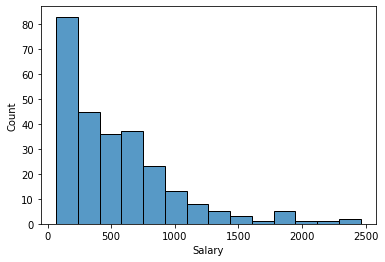

In [5]:
sns.histplot(dataset.Salary)

In [6]:
sal=dataset['Salary'].median()
print(f"Median Salary: {sal} in thousands")

Median Salary: 425.0 in thousands


In [7]:
dataset['Salary'].fillna(sal, inplace=True)

### Split into Independent and Dependent

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [9]:
X=dataset.drop("Salary", axis=1)
y=dataset[['Salary']]

In [10]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N


### Categorical Data

In [11]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')

In [12]:
X=pd.get_dummies(dataset[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague']], drop_first=True)

In [13]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1


- League: A=0, N=1
- Division:E=0, W=1
- NewLeague: A=0, N=1

## Experiment 1

### Split into Training,  Test, and Validation Set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest=train_test_split(X,y, test_size=.2, random_state=42)

In [15]:
X_test, X_val, y_test, y_val=train_test_split(X_rest, y_rest, test_size=.5, random_state=42)

### Training Multiple Linear Regression Model on Training Set

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

### Intercept and Coefficient

In [17]:
print("Coefficients: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficients:  [[  -1.84392487    5.64955572    6.41685771   -0.78471423   -1.80920504
     5.39770466   -8.10061575   -0.25169007    0.68436735   -0.12996374
     0.82361556    0.8603073    -0.74118308    0.15800697    0.3464796
    -3.01441598   56.62249108 -101.33941646  -29.58380564]]
Intercept:  [331.99846529]


In [18]:
X_train.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

### Forumula
#### Salary = 382.75 - 1.82(AtBat) + 5.52(Hits) + 5.93(HmRun) - 0.91(Runs) - 1.94(RBI) + 5.15(Walks) - 8.03(Years)  - 0.24 (CAtBat) + 0.62(CHits) - 0.13(CHmRun) + 0.88(CRuns) + 0.87(CRBI) - 0.76(CWalks) + 0.18(PutOuts) + 0.33(Assists) - 3.27(Errors) + 37.49(League_N) - 101.26(Division_W) -24.57(NewLeague_N)

### Validation Set

In [19]:
y_predval=regressor.predict(X_val.values)
y_predval

array([[ 417.53189514],
       [ 592.1133885 ],
       [ 316.07121096],
       [1269.56521234],
       [ 346.74426032],
       [ 356.21229993],
       [ 537.90492192],
       [ 199.13324541],
       [ 452.53907922],
       [ 693.97232683],
       [ 484.24769973],
       [ 415.25895654],
       [ 404.73621505],
       [ 932.14482518],
       [ 839.65302147],
       [1064.41091628],
       [ 647.03607922],
       [ 398.61437855],
       [ 449.70795713],
       [ 141.93892064],
       [ 418.16794603],
       [ 259.26749287],
       [1116.78772571],
       [1059.5795707 ],
       [ 314.40111524],
       [ 401.72426547],
       [ 309.62090898],
       [ 407.44267332],
       [ 467.42599149],
       [ 376.4879618 ],
       [ 440.92052658],
       [ 326.3306622 ],
       [ 497.91342729]])

In [20]:
y_validate=y_val.to_numpy()

In [21]:
np.hstack((y_predval, y_validate)).round()

array([[ 418.,  210.],
       [ 592., 1940.],
       [ 316.,  425.],
       [1270.,  425.],
       [ 347.,  362.],
       [ 356.,   90.],
       [ 538.,  500.],
       [ 199.,  350.],
       [ 453.,  535.],
       [ 694., 1175.],
       [ 484.,  550.],
       [ 415.,  525.],
       [ 405.,  425.],
       [ 932., 1900.],
       [ 840., 1670.],
       [1064.,  425.],
       [ 647., 1100.],
       [ 399.,  325.],
       [ 450.,  425.],
       [ 142.,  175.],
       [ 418.,  400.],
       [ 259.,  190.],
       [1117.,  425.],
       [1060.,  775.],
       [ 314.,  425.],
       [ 402.,  750.],
       [ 310.,  425.],
       [ 407.,  425.],
       [ 467.,  120.],
       [ 376.,  145.],
       [ 441.,  425.],
       [ 326.,  305.],
       [ 498.,  215.]])

### Predicting Test Set Results

In [22]:
y_pred=regressor.predict(X_test.values)

### RMSE and R Square

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"R-Square: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R-Square: 0.57
MSE: 70142.46
RMSE: 264.84


## Experiment 2

### Split into Training, Test, and Validation Set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest=train_test_split(X,y, test_size=.25, random_state=42)

In [25]:
X_test, X_val, y_test, y_val=train_test_split(X_rest, y_rest, test_size=.5, random_state=42)

### Training Multiple Linear Regression Model on Training Set

In [26]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

### Intercept and Coefficient

In [27]:
print("Coefficients: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficients:  [[-1.98139539e+00  5.56706194e+00  5.02528242e+00  9.97471541e-03
  -9.20379847e-01  4.92775907e+00 -1.04881295e+01 -2.12593660e-01
   5.92982946e-01 -3.56206341e-02  8.80399139e-01  7.97508567e-01
  -8.20333345e-01  1.83214183e-01  4.00775139e-01 -4.25390313e+00
   5.08151324e+01 -1.15296836e+02 -2.30418537e+01]]
Intercept:  [344.32750983]


### Validation Set

In [28]:
y_predval=regressor.predict(X_val.values)
y_predval

array([[ 722.81311549],
       [ 313.45350872],
       [ 390.18493905],
       [ 453.81275948],
       [ 571.54376591],
       [ 901.81420549],
       [ 821.23808042],
       [ 843.05013078],
       [1120.01220681],
       [ 199.52167756],
       [ 620.31290266],
       [ 502.01740272],
       [1314.7580425 ],
       [ 316.90077465],
       [ 357.59555542],
       [1271.00752405],
       [ 227.43630416],
       [ 368.56697532],
       [ 312.91851041],
       [ 450.40740552],
       [ 436.63878882],
       [ 440.21316853],
       [ 359.96000328],
       [ 352.01461701],
       [ 855.49723012],
       [ 491.65855075],
       [ 433.86981468],
       [ 579.4471586 ],
       [ 549.37354287],
       [ 322.51297707],
       [ 474.8098845 ],
       [ 381.07645326],
       [ 587.77817198],
       [ 365.96697238],
       [ 405.63536177],
       [ 421.92067598],
       [ 156.6650881 ],
       [1075.22521517],
       [ 330.6838801 ],
       [ 916.66904443],
       [ 221.5788191 ]])

In [29]:
y_validate=y_val.to_numpy()

In [30]:
np.hstack((y_predval, y_validate)).round()

array([[ 723., 1175.],
       [ 313.,  425.],
       [ 390.,  215.],
       [ 454.,  425.],
       [ 572.,  765.],
       [ 902.,  800.],
       [ 821.,  588.],
       [ 843.,  535.],
       [1120.,  425.],
       [ 200.,  350.],
       [ 620.,  850.],
       [ 502.,  550.],
       [1315.,  777.],
       [ 317.,  195.],
       [ 358.,   86.],
       [1271.,  425.],
       [ 227.,  425.],
       [ 369.,   90.],
       [ 313.,  425.],
       [ 450.,  425.],
       [ 437.,  525.],
       [ 440.,  535.],
       [ 360.,  362.],
       [ 352.,  425.],
       [ 855., 1670.],
       [ 492.,  215.],
       [ 434.,  278.],
       [ 579.,  350.],
       [ 549.,  500.],
       [ 323.,  250.],
       [ 475.,  120.],
       [ 381.,  140.],
       [ 588.,  425.],
       [ 366.,  145.],
       [ 406.,  210.],
       [ 422.,  750.],
       [ 157.,  175.],
       [1075.,  425.],
       [ 331.,  305.],
       [ 917., 1900.],
       [ 222.,  385.]])

### Predicting Test Set Results

In [31]:
y_pred=regressor.predict(X_test.values)

### RMSE and R Square

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"R-Square: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R-Square: 0.48
MSE: 119294.17
RMSE: 345.39


## Experiment 3

### Split into Training,  Test, and Validation Set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest=train_test_split(X,y, test_size=.3, random_state=42)

In [34]:
X_test, X_val, y_test, y_val=train_test_split(X_rest, y_rest, test_size=.5, random_state=42)

### Training Multiple Linear Regression Model on Training Set

In [35]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

### Intercept and Coefficient

In [36]:
print("Coefficients: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficients:  [[-1.70175850e+00  4.88773966e+00  5.72615383e+00  9.19167441e-02
  -1.26194694e+00  4.78759637e+00 -7.48915497e+00 -1.99429840e-01
   4.62411852e-01 -4.92172013e-01  9.17669773e-01  8.27815936e-01
  -6.72485239e-01  1.94649725e-01  2.94782930e-01 -3.39774000e+00
   7.51523273e+01 -1.07372921e+02 -3.43103413e+01]]
Intercept:  [312.20107449]


### Validation Set

In [37]:
y_predval=regressor.predict(X_val.values)
y_predval

array([[ 516.69194663],
       [ 451.51516085],
       [ 579.71821997],
       [ 600.03776565],
       [ 106.05638864],
       [ 534.50186672],
       [ 453.56953833],
       [ 431.37885674],
       [ 762.61481924],
       [ 303.61559138],
       [ 455.37143696],
       [ 706.24106951],
       [ 354.86862709],
       [ 446.45386867],
       [ 335.23275298],
       [1075.88776523],
       [ 385.77836163],
       [ 212.96966571],
       [ 367.62817531],
       [ 239.94997234],
       [ 551.81162045],
       [ 880.49427037],
       [ 357.5879021 ],
       [ 201.58282617],
       [ 373.90877242],
       [ 496.97181438],
       [ 436.74187209],
       [ 378.8957762 ],
       [ 343.83504302],
       [ 882.34604534],
       [ 256.81892853],
       [ 692.03648606],
       [ 826.54904465],
       [1571.00846393],
       [ 338.76456754],
       [1179.94034102],
       [1313.11942102],
       [ 325.43778423],
       [ 528.57936345],
       [ 633.04637097],
       [ 912.47322344],
       [ 560.142

In [38]:
y_validate=y_val.to_numpy()

In [39]:
np.hstack((y_predval, y_validate)).round()

array([[ 517.,  215.],
       [ 452.,  425.],
       [ 580.,  560.],
       [ 600.,  765.],
       [ 106.,  110.],
       [ 535.,  210.],
       [ 454.,  535.],
       [ 431.,  278.],
       [ 763.,  588.],
       [ 304.,  425.],
       [ 455.,  425.],
       [ 706.,  215.],
       [ 355.,  425.],
       [ 446.,  425.],
       [ 335.,  305.],
       [1076.,  425.],
       [ 386.,  215.],
       [ 213.,  350.],
       [ 368.,  145.],
       [ 240.,  425.],
       [ 552.,  850.],
       [ 880.,  535.],
       [ 358.,   86.],
       [ 202.,  342.],
       [ 374.,  250.],
       [ 497.,  550.],
       [ 437.,  525.],
       [ 379.,  140.],
       [ 344.,  432.],
       [ 882., 1310.],
       [ 257.,  300.],
       [ 692., 1175.],
       [ 827.,  800.],
       [1571., 2412.],
       [ 339.,  362.],
       [1180.,  425.],
       [1313., 1500.],
       [ 325.,  195.],
       [ 529.,  500.],
       [ 633.,  430.],
       [ 912., 1670.],
       [ 560.,  425.],
       [ 299.,  425.],
       [ 41

### Predicting Test Set Results

In [40]:
y_pred=regressor.predict(X_test.values)

### RMSE and R Square

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"R-Square: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R-Square: 0.47
MSE: 111810.01
RMSE: 334.38
